In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [284]:
df=pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [285]:
df['Country Code'].unique()

array([162,  30, 216,  14,  37, 184, 214,   1,  94, 148, 215, 166, 189,
       191, 208])

In [286]:
df['Restaurant ID'].unique()

array([6317637, 6304287, 6300002, ..., 5915807, 5916112, 5927402],
      shape=(9551,))

In [287]:
df.drop('Restaurant ID',axis=1,inplace=True)

In [288]:
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [289]:
df['Is delivering now'].unique()

array(['No', 'Yes'], dtype=object)

In [290]:
df_tb=pd.get_dummies(df['Is delivering now'],drop_first=True)
df_tb

,Yes
0,False
1,False
2,False
3,False
4,False
...,...
9546,False
9547,False
9548,False
9549,False


In [291]:
df1=pd.concat([df,df_tb],axis=1)
df1.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Yes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,False
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,False
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Yes,No,No,No,4,4.4,Green,Very Good,270,False
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,No,4,4.9,Dark Green,Excellent,365,False
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,False


In [292]:
df1=df1.replace({True:1,False:0})
df1.head()

C:\Users\91810\AppData\Local\Temp\ipykernel_16936\3743159398.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1=df1.replace({True:1,False:0})


,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Yes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,0
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,0
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Yes,No,No,No,4,4.4,Green,Very Good,270,0
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,No,4,4.9,Dark Green,Excellent,365,0
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,0


In [293]:
df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [294]:
df_OD=pd.get_dummies(df['Has Online delivery'],drop_first=True)
df2=df_OD.rename(columns={'Yes':'OD'})
df1.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Yes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,0
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,0
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Yes,No,No,No,4,4.4,Green,Very Good,270,0
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,No,4,4.9,Dark Green,Excellent,365,0
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,0


In [295]:
df1=pd.concat([df1,df2],axis=1)
df1=df1.replace({True:1,False:0})
df1.head()

C:\Users\91810\AppData\Local\Temp\ipykernel_16936\1871700841.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1=df1.replace({True:1,False:0})


,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Yes,OD
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,No,No,No,3,4.8,Dark Green,Excellent,314,0,0
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,No,No,No,3,4.5,Dark Green,Excellent,591,0,0
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,No,No,No,4,4.4,Green,Very Good,270,0,0
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,4,4.9,Dark Green,Excellent,365,0,0
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,No,No,No,4,4.8,Dark Green,Excellent,229,0,0


In [296]:
df1['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

In [297]:
df_dn=pd.get_dummies(df1['Has Table booking'],drop_first=True)
df_dn=df_dn.rename(columns={'Yes':'DN'})
df_dn.head()

,DN
0,True
1,True
2,True
3,False
4,True


In [298]:
df1=pd.concat([df1,df_dn],axis=1)
df1=df1.replace({True:1,False:0})
df1.head()

C:\Users\91810\AppData\Local\Temp\ipykernel_16936\4294641839.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1=df1.replace({True:1,False:0})


,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Yes,OD,DN
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,No,No,3,4.8,Dark Green,Excellent,314,0,0,1
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,No,No,3,4.5,Dark Green,Excellent,591,0,0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,No,No,4,4.4,Green,Very Good,270,0,0,1
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,4,4.9,Dark Green,Excellent,365,0,0,0
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,No,No,4,4.8,Dark Green,Excellent,229,0,0,1


In [299]:
df1.drop('Has Online delivery',axis=1,inplace=True)

In [300]:
df1.drop('Is delivering now',axis=1,inplace=True)

In [301]:
df1.drop('Has Table booking',axis=1,inplace=True)

In [302]:
df1.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Yes,OD,DN
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),No,3,4.8,Dark Green,Excellent,314,0,0,1
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),No,3,4.5,Dark Green,Excellent,591,0,0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),No,4,4.4,Green,Very Good,270,0,0,1
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,4,4.9,Dark Green,Excellent,365,0,0,0
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),No,4,4.8,Dark Green,Excellent,229,0,0,1


In [303]:
df1['Switch to order menu'].unique()

array(['No'], dtype=object)

In [304]:
df1.drop('Switch to order menu',axis=1,inplace=True)
df1.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes,Yes,OD,DN
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),3,4.8,Dark Green,Excellent,314,0,0,1
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),3,4.5,Dark Green,Excellent,591,0,0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),4,4.4,Green,Very Good,270,0,0,1
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),4,4.9,Dark Green,Excellent,365,0,0,0
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),4,4.8,Dark Green,Excellent,229,0,0,1


In [305]:
df1['Currency'].value_counts()

Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(��)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64

In [306]:
df1.drop('Currency',axis=1,inplace=True)
df1

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Yes,OD,DN
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,3,4.8,Dark Green,Excellent,314,0,0,1
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,3,4.5,Dark Green,Excellent,591,0,0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,4,4.4,Green,Very Good,270,0,0,1
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,4,4.9,Dark Green,Excellent,365,0,0,0
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,4,4.8,Dark Green,Excellent,229,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,3,4.1,Green,Very Good,788,0,0,0
9547,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,3,4.2,Green,Very Good,1034,0,0,0
9548,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,4,3.7,Yellow,Good,661,0,0,0
9549,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,4,4.0,Green,Very Good,901,0,0,0


In [307]:
df1.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Yes                     0
OD                      0
DN                      0
dtype: int64

In [308]:
df2=df1.groupby(['Rating color','Rating text']).size()

In [309]:
df2

Rating color  Rating text
Dark Green    Excellent       301
Green         Very Good      1079
Orange        Average        3737
Red           Poor            186
White         Not rated      2148
Yellow        Good           2100
dtype: int64

In [310]:
df1['Rating color']=df['Rating color'].map({'Dark Green':1,'Green':2,'Yellow':3,'Orange':4,'Red':5,'White':6})

In [311]:
df1.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Yes,OD,DN
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,3,4.8,1,Excellent,314,0,0,1
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,3,4.5,1,Excellent,591,0,0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,4,4.4,2,Very Good,270,0,0,1
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,4,4.9,1,Excellent,365,0,0,0
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,4,4.8,1,Excellent,229,0,0,1


In [312]:
##second technqiue
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df1['Rating color']= label_encoder.fit_transform(df1['Rating color'])
df1.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Yes,OD,DN
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,3,4.8,0,Excellent,314,0,0,1
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,3,4.5,0,Excellent,591,0,0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,4,4.4,1,Very Good,270,0,0,1
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,4,4.9,0,Excellent,365,0,0,0
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,4,4.8,0,Excellent,229,0,0,1


In [313]:
df1['Rating text']=df['Rating text'].map({'Excellent':6,'Very Good':5,'Good':4,'Average':3,'Poor':2,'Not rated':1})

In [314]:
##second technqiue
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df1['Rating text']= label_encoder.fit_transform(df1['Rating text'])
df1.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Yes,OD,DN
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,3,4.8,0,5,314,0,0,1
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,3,4.5,0,5,591,0,0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,4,4.4,1,4,270,0,0,1
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,4,4.9,0,5,365,0,0,0
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,4,4.8,0,5,229,0,0,1


In [315]:
(df1['Rating color'] == df1['Rating text']).all()

np.False_

In [316]:
df1.drop('Rating color',axis=1,inplace=True)

In [317]:
df1.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Yes,OD,DN
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,3,4.8,5,314,0,0,1
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,3,4.5,5,591,0,0,1
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,4,4.4,4,270,0,0,1
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,4,4.9,5,365,0,0,0
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,4,4.8,5,229,0,0,1


In [318]:
(df1['Locality'] == df1['Locality Verbose']).all()

np.False_

In [319]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['City'] = le.fit_transform(df1['City'])

city_mapping = dict(zip(le.classes_, range(len(le.classes_))))

# Print the mapping
print("Label Encoding Mapping for City Column:")
for city, encoded_value in city_mapping.items():
    print(f"{city} -> {encoded_value}")

Label Encoding Mapping for City Column:
Abu Dhabi -> 0
Agra -> 1
Ahmedabad -> 2
Albany -> 3
Allahabad -> 4
Amritsar -> 5
Ankara -> 6
Armidale -> 7
Athens -> 8
Auckland -> 9
Augusta -> 10
Aurangabad -> 11
Balingup -> 12
Bandung -> 13
Bangalore -> 14
Beechworth -> 15
Bhopal -> 16
Bhubaneshwar -> 17
Birmingham -> 18
Bogor -> 19
Boise -> 20
Bras�_lia -> 21
Cape Town -> 22
Cedar Rapids/Iowa City -> 23
Chandigarh -> 24
Chatham-Kent -> 25
Chennai -> 26
Clatskanie -> 27
Cochrane -> 28
Coimbatore -> 29
Colombo -> 30
Columbus -> 31
Consort -> 32
Dalton -> 33
Davenport -> 34
Dehradun -> 35
Des Moines -> 36
Dicky Beach -> 37
Doha -> 38
Dubai -> 39
Dubuque -> 40
East Ballina -> 41
Edinburgh -> 42
Faridabad -> 43
Fernley -> 44
Flaxton -> 45
Forrest -> 46
Gainesville -> 47
Ghaziabad -> 48
Goa -> 49
Gurgaon -> 50
Guwahati -> 51
Hepburn Springs -> 52
Huskisson -> 53
Hyderabad -> 54
Indore -> 55
Inner City -> 56
Inverloch -> 57
Jaipur -> 58
Jakarta -> 59
Johannesburg -> 60
Kanpur -> 61
Kochi -> 62
Kolka

In [320]:
df1.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Yes,OD,DN
0,Le Petit Souffle,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,3,4.8,5,314,0,0,1
1,Izakaya Kikufuji,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,3,4.5,5,591,0,0,1
2,Heat - Edsa Shangri-La,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,4,4.4,4,270,0,0,1
3,Ooma,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,4,4.9,5,365,0,0,0
4,Sambo Kojin,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,4,4.8,5,229,0,0,1


In [321]:
df1['Cuisines']=df1['Cuisines'].str.lower()

In [322]:
df1.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Yes,OD,DN
0,Le Petit Souffle,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"french, japanese, desserts",1100,3,4.8,5,314,0,0,1
1,Izakaya Kikufuji,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,japanese,1200,3,4.5,5,591,0,0,1
2,Heat - Edsa Shangri-La,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"seafood, asian, filipino, indian",4000,4,4.4,4,270,0,0,1
3,Ooma,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"japanese, sushi",1500,4,4.9,5,365,0,0,0
4,Sambo Kojin,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"japanese, korean",1500,4,4.8,5,229,0,0,1


In [323]:
df1['Cuisines'].unique()


array(['french, japanese, desserts', 'japanese',
       'seafood, asian, filipino, indian', ..., 'burger, izgara',
       'world cuisine, patisserie, cafe', 'italian, world cuisine'],
      shape=(1826,), dtype=object)

In [324]:
df1['Locality_Freq'] = df1['Locality'].map(df['Locality'].value_counts())

locality_freq_mapping = df1['Locality'].value_counts().to_dict()

# Display the mapping
for locality, freq in locality_freq_mapping.items():
    print(f"'{locality}' -> {freq}")

'Connaught Place' -> 122
'Rajouri Garden' -> 99
'Shahdara' -> 87
'Defence Colony' -> 86
'Malviya Nagar' -> 85
'Pitampura' -> 85
'Mayur Vihar Phase 1' -> 84
'Rajinder Nagar' -> 81
'Safdarjung' -> 80
'Satyaniketan' -> 79
'Krishna Nagar' -> 77
'Karol Bagh' -> 76
'Sector 62' -> 76
'Sector 18' -> 75
'Hauz Khas' -> 74
'Kalkaji' -> 73
'Sector 15' -> 71
'Mahipalpur' -> 69
'DLF Phase 3' -> 69
'Mukherjee Nagar' -> 68
'Shalimar Bagh' -> 67
'Chandni Chowk' -> 67
'Greater Kailash (GK) 2' -> 66
'Greater Kailash (GK) 1' -> 66
'Kamla Nagar' -> 65
'Delhi University-GTB Nagar' -> 65
'Paharganj' -> 64
'MG Road' -> 63
'Vasundhara Enclave' -> 62
'Sector 72' -> 61
'Jail Road' -> 61
'Tilak Nagar' -> 61
'Punjabi Bagh' -> 60
'Vikaspuri' -> 60
'Palam' -> 60
'Najafgarh' -> 60
'Sector 56' -> 59
'Uttam Nagar' -> 59
'Laxmi Nagar' -> 58
'Jangpura' -> 57
'Dilshad Garden' -> 57
'Kirti Nagar' -> 56
'Paschim Vihar' -> 56
'East of Kailash' -> 56
'Naraina' -> 54
'Sector 110' -> 53
'Sector 14' -> 52
'Sector 31' -> 52
'Subh

In [325]:
df1.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Yes,OD,DN,Locality_Freq
0,Le Petit Souffle,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"french, japanese, desserts",1100,3,4.8,5,314,0,0,1,1
1,Izakaya Kikufuji,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,japanese,1200,3,4.5,5,591,0,0,1,1
2,Heat - Edsa Shangri-La,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"seafood, asian, filipino, indian",4000,4,4.4,4,270,0,0,1,1
3,Ooma,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"japanese, sushi",1500,4,4.9,5,365,0,0,0,3
4,Sambo Kojin,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"japanese, korean",1500,4,4.8,5,229,0,0,1,3


In [326]:
df1.drop('Address',axis=1,inplace=True)

In [327]:
df1.head()

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Yes,OD,DN,Locality_Freq
0,Le Petit Souffle,162,73,"Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"french, japanese, desserts",1100,3,4.8,5,314,0,0,1,1
1,Izakaya Kikufuji,162,73,"Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,japanese,1200,3,4.5,5,591,0,0,1,1
2,Heat - Edsa Shangri-La,162,75,"Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"seafood, asian, filipino, indian",4000,4,4.4,4,270,0,0,1,1
3,Ooma,162,75,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"japanese, sushi",1500,4,4.9,5,365,0,0,0,3
4,Sambo Kojin,162,75,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"japanese, korean",1500,4,4.8,5,229,0,0,1,3


In [328]:
df1['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [329]:
df1['Restaurant_nf'] = df1['Restaurant Name'].map(df['Restaurant Name'].value_counts())
df1.drop('Restaurant Name',axis=1,inplace=True)

In [330]:
df1.head()

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Yes,OD,DN,Locality_Freq,Restaurant_nf
0,162,73,"Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"french, japanese, desserts",1100,3,4.8,5,314,0,0,1,1,1
1,162,73,"Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,japanese,1200,3,4.5,5,591,0,0,1,1,1
2,162,75,"Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"seafood, asian, filipino, indian",4000,4,4.4,4,270,0,0,1,1,1
3,162,75,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"japanese, sushi",1500,4,4.9,5,365,0,0,0,3,1
4,162,75,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"japanese, korean",1500,4,4.8,5,229,0,0,1,3,1


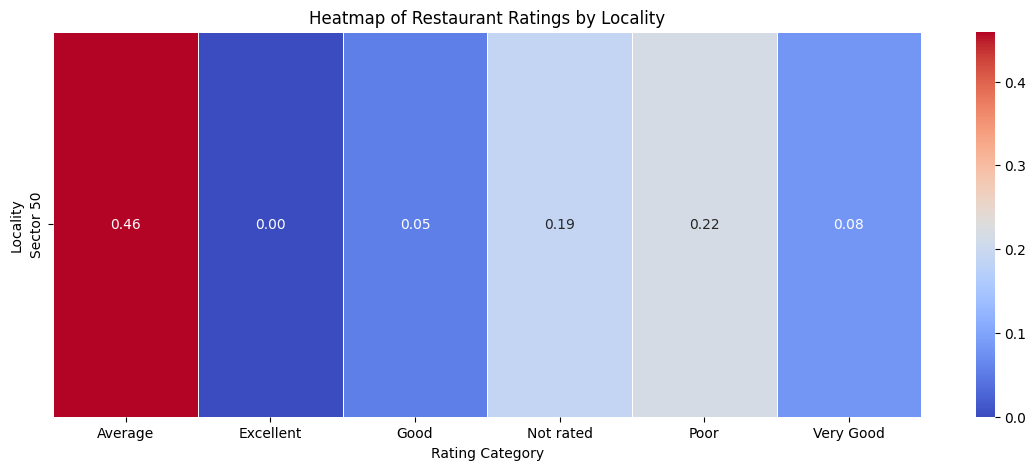

In [331]:
df_grouped = df.groupby('Locality')['Rating text'].value_counts(normalize=True).unstack()
df_grouped.fillna(0, inplace=True)  # Replace NaNs with 0

filtered_df = df_grouped[df_grouped.sum(axis=1) > 1]  # Adjust threshold

if not filtered_df.empty:
    plt.figure(figsize=(14, 5))
    sns.heatmap(filtered_df, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".2f")
    plt.title("Heatmap of Restaurant Ratings by Locality")
    plt.ylabel("Locality")
    plt.xlabel("Rating Category")
    plt.show()
else:
    print("No valid data to plot after filtering!")


In [332]:
df1.drop('Locality',axis=1,inplace=True)

In [333]:
print("Unique Locality Verbose:", df1['Locality Verbose'].nunique(), "out of", df1.shape[0], "rows")

Unique Locality Verbose: 1265 out of 9551 rows


In [334]:
df1['Locality_vf'] = df1['Locality Verbose'].map(df['Locality Verbose'].value_counts())

In [335]:
df1.drop('Locality Verbose',axis=1,inplace=True)
df1.head()

,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Yes,OD,DN,Locality_Freq,Restaurant_nf,Locality_vf
0,162,73,121.027535,14.565443,"french, japanese, desserts",1100,3,4.8,5,314,0,0,1,1,1,1
1,162,73,121.014101,14.553708,japanese,1200,3,4.5,5,591,0,0,1,1,1,1
2,162,75,121.056831,14.581404,"seafood, asian, filipino, indian",4000,4,4.4,4,270,0,0,1,1,1,1
3,162,75,121.056475,14.585318,"japanese, sushi",1500,4,4.9,5,365,0,0,0,3,1,3
4,162,75,121.057508,14.584450,"japanese, korean",1500,4,4.8,5,229,0,0,1,3,1,3


In [336]:
# Step 1: Generate the mapping dynamically
cuisine_mapping = df['Cuisines'].value_counts().to_dict()

# Step 2: Create a function to convert text input to its mapped frequency
def get_cuisine_frequency(cuisine_name):
    return cuisine_mapping.get(cuisine_name, 0)  # Returns 0 if cuisine is not found

# Example Usage
user_input_cuisine = "North Indian"  # Replace this with any input
mapped_value = get_cuisine_frequency(user_input_cuisine)
print(f"Mapped Value for '{user_input_cuisine}': {mapped_value}")


Mapped Value for 'North Indian': 936


In [337]:
cuisines_target_mean = df1.groupby('Cuisines')['Rating text'].mean()
df1['Cuisines_freq'] = df1['Cuisines'].map(cuisines_target_mean)

In [338]:
df1.drop('Cuisines',axis=1,inplace=True)
df1.head()

,Country Code,City,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Yes,OD,DN,Locality_Freq,Restaurant_nf,Locality_vf,Cuisines_freq
0,162,73,121.027535,14.565443,1100,3,4.8,5,314,0,0,1,1,1,1,5.000000
1,162,73,121.014101,14.553708,1200,3,4.5,5,591,0,0,1,1,1,1,3.058824
2,162,75,121.056831,14.581404,4000,4,4.4,4,270,0,0,1,1,1,1,4.000000
3,162,75,121.056475,14.585318,1500,4,4.9,5,365,0,0,0,3,1,3,3.500000
4,162,75,121.057508,14.584450,1500,4,4.8,5,229,0,0,1,3,1,3,3.666667


In [339]:
df1.drop('Yes',axis=1,inplace=True)

In [340]:
df1.drop('OD',axis=1,inplace=True)

In [341]:
df1.drop('DN',axis=1,inplace=True)

In [342]:
df1.drop('City',axis=1,inplace=True)

In [343]:
df1.drop('Restaurant_nf',axis=1,inplace=True)

In [344]:
df1.drop('Locality_vf',axis=1,inplace=True)

In [345]:
df1.head()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Locality_Freq,Cuisines_freq
0,162,121.027535,14.565443,1100,3,4.8,5,314,1,5.000000
1,162,121.014101,14.553708,1200,3,4.5,5,591,1,3.058824
2,162,121.056831,14.581404,4000,4,4.4,4,270,1,4.000000
3,162,121.056475,14.585318,1500,4,4.9,5,365,3,3.500000
4,162,121.057508,14.584450,1500,4,4.8,5,229,3,3.666667


In [346]:
df1['Aggregate rating'].min()

np.float64(0.0)

In [347]:
df1['Latitude'].max()

np.float64(55.97698)

In [348]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select the features to scale
features_to_scale = ['Votes']

# Fit and transform the selected features
scaled_values = scaler.fit_transform(df1[features_to_scale])

# Create a DataFrame with scaled features and proper column names
scaled_df = pd.DataFrame(scaled_values, columns=[f"{col}_scaled" for col in features_to_scale])

# Reset index to match original df1 before concatenation (optional safety)
scaled_df.index = df1.index

# Concatenate scaled features back to original dataframe
df1 = pd.concat([df1, scaled_df], axis=1)

df1.head()


,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Locality_Freq,Cuisines_freq,Votes_scaled
0,162,121.027535,14.565443,1100,3,4.8,5,314,1,5.000000,0.365202
1,162,121.014101,14.553708,1200,3,4.5,5,591,1,3.058824,1.009168
2,162,121.056831,14.581404,4000,4,4.4,4,270,1,4.000000,0.262911
3,162,121.056475,14.585318,1500,4,4.9,5,365,3,3.500000,0.483766
4,162,121.057508,14.584450,1500,4,4.8,5,229,3,3.666667,0.167595


In [349]:
df1.drop(['Votes'], axis=1, inplace=True)
df1.head()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Locality_Freq,Cuisines_freq,Votes_scaled
0,162,121.027535,14.565443,1100,3,4.8,5,1,5.000000,0.365202
1,162,121.014101,14.553708,1200,3,4.5,5,1,3.058824,1.009168
2,162,121.056831,14.581404,4000,4,4.4,4,1,4.000000,0.262911
3,162,121.056475,14.585318,1500,4,4.9,5,3,3.500000,0.483766
4,162,121.057508,14.584450,1500,4,4.8,5,3,3.666667,0.167595


In [350]:
X=df1[['Rating text','Votes_scaled','Cuisines_freq','Locality_Freq','Longitude','Latitude']]
X.head()

,Rating text,Votes_scaled,Cuisines_freq,Locality_Freq,Longitude,Latitude
0,5,0.365202,5.000000,1,121.027535,14.565443
1,5,1.009168,3.058824,1,121.014101,14.553708
2,4,0.262911,4.000000,1,121.056831,14.581404
3,5,0.483766,3.500000,3,121.056475,14.585318
4,5,0.167595,3.666667,3,121.057508,14.584450


In [351]:
y=df1[['Aggregate rating']]
y.head()

,Aggregate rating
0,4.8
1,4.5
2,4.4
3,4.9
4,4.8


In [352]:
df1=pd.concat([df1, scaled_df], axis=1)

In [353]:
df1.head()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Locality_Freq,Cuisines_freq,Votes_scaled,Votes_scaled
0,162,121.027535,14.565443,1100,3,4.8,5,1,5.000000,0.365202,0.365202
1,162,121.014101,14.553708,1200,3,4.5,5,1,3.058824,1.009168,1.009168
2,162,121.056831,14.581404,4000,4,4.4,4,1,4.000000,0.262911,0.262911
3,162,121.056475,14.585318,1500,4,4.9,5,3,3.500000,0.483766,0.483766
4,162,121.057508,14.584450,1500,4,4.8,5,3,3.666667,0.167595,0.167595


In [354]:
df1['Country Code'].max()

np.int64(216)

In [355]:
X.head()

,Rating text,Votes_scaled,Cuisines_freq,Locality_Freq,Longitude,Latitude
0,5,0.365202,5.000000,1,121.027535,14.565443
1,5,1.009168,3.058824,1,121.014101,14.553708
2,4,0.262911,4.000000,1,121.056831,14.581404
3,5,0.483766,3.500000,3,121.056475,14.585318
4,5,0.167595,3.666667,3,121.057508,14.584450


In [356]:
y.head()

,Aggregate rating
0,4.8
1,4.5
2,4.4
3,4.9
4,4.8


In [357]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [358]:
from sklearn.ensemble import RandomForestRegressor
randomreg=RandomForestRegressor(n_estimators=50)
randomreg.fit(X_train,y_train)

c:\Users\91810\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=50)

In [359]:
randomreg.score(X_test,y_test)

0.985832522464922

In [360]:
y_predicted=randomreg.predict(X_test)
y_predicted

array([2.362, 4.166, 2.974, ..., 3.694, 3.122, 0.   ], shape=(3152,))

C:\Users\91810\AppData\Local\Temp\ipykernel_16936\3905501508.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette='viridis')


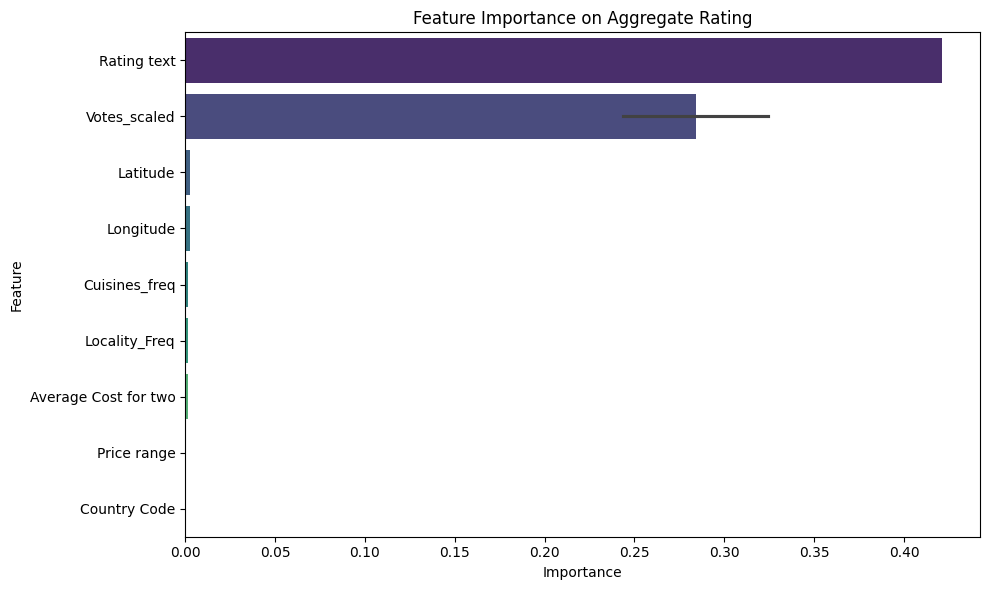

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df1.drop('Aggregate rating', axis=1)
y = df1['Aggregate rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier plotting
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance on Aggregate Rating')
plt.tight_layout()
plt.show()


In [362]:
import pickle

# Save the trained model (randomreg) as 'randomreg.pkl'
with open("randomreg.pkl", "wb") as file:
    pickle.dump(randomreg, file)

print("Model saved successfully as 'randomreg.pkl'!")

Model saved successfully as 'randomreg.pkl'!


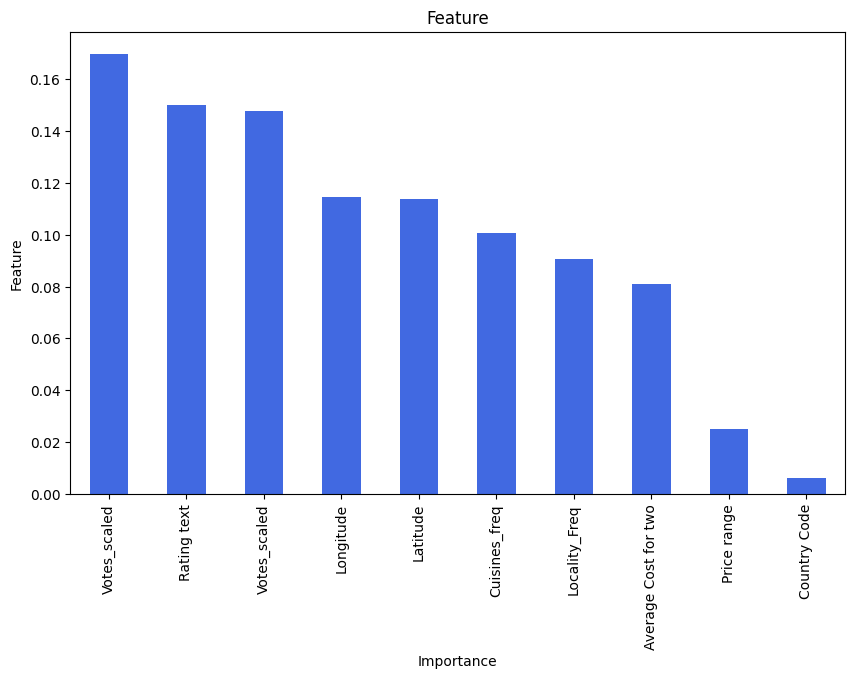

In [363]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the target variable (Rating text) into numeric values
le = LabelEncoder()
df1['Aggregate rating'] = le.fit_transform(df1['Aggregate rating'])

# Define X (features) and y (target)
X = df1.drop(columns=['Aggregate rating'])  # Drop target variable
y = df1['Aggregate rating']  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='royalblue')
plt.title("Feature")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
